## **Assignment #1: EDA & Dataset**




### **Overview**

In this first assignment, you will gain hands-on experience selecting and preparing a dataset, performing exploratory data analysis (EDA), adding it to HF's Datasets, and presenting your findings in a short video.

Through these steps, you’ll begin building essential data science skills in Python.

Think of your notebook as a cohesive story where EDA reveals the narrative of your data, which provides the resolution to the main question or goal.

### **Objectives**

1. Explore various data tools/hubs (e.g., Kaggle, UCI, or local data) to find a suitable dataset.
2. Prepare the selected dataset, focusing on cleaning, transformation, manipulation, and quality.
3. Build foundational EDA skills, including  missing data, outlier handling, and clear data visualization.
4. Upload your work and your dataset to HuggingFace.
5. Communicate findings concisely in both a structured notebook, README file,  and a short video presentation, demonstrating clarity in each step of the workflow.

### **Submission Guidelines**

1. Please note that this is an individual assignment.
2. Submit a text file with your info and the link to HF's dataset.
3. The dataset will include all of your work.
  - **Python Notebook**: a well-structured notebook (e.g.`.ipynb` file) with clear comments or markdown explanations of each step.
  - **Video Link**: the README file will include your short video presentation at the beginning of the file.
4. **Oral Report**: Students may be randomly chosen to present their work in a quick online session with the T.A., typically lasting ±10 minutes.





### **Evaluation Criteria**

- **Organization & Clarity (20%)**: Overall structure of your HF Dataset, code, notebook, clear communication, and a concise summary.
- **Data Handling (30%)**: Quality of data cleaning, appropriate handling of outliers, and more.
- **Visualizations (30%)**: well-presented relevant visuals.
- **Presentation (20%)**: Clearly communicated approach and findings in your 2–3 minute overview.



### **Additional Tips**

- The first thing you should do is download a copy of this notebook to your drive.
- Keep your dataset size manageable. If the dataset is large, you can sample a subset.
- A few clear visuals are more effective than many complicated ones.
- Ask for help or feedback early if you get stuck.

<br><br><br>

---

Reminder: Always start with copy the NOTEBOOK to your drive.

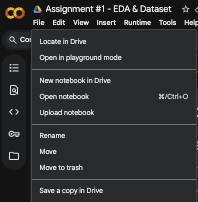

---

<br><br><br>

# **Part 1: Select a Dataset**

1. Choose a numeric tabular dataset, such as the . If you prefer, you may use other open-source datasets; [Hugginface](https://huggingface.co/datasets?task_categories=task_categories:tabular-classification&sort=trending), [Kaggle](https://www.kaggle.com/datasets?tags=13302-Classification&minUsabilityRating=8.00+or+higher), etc.


    Examples for a good dataset:
      - "Determine a genre of a song"
      - "Determine the type of flowers"
      - "Determine the animal - cat or dog"
      - "Determine the category of a product"
      - "Determine if an email is spam or not spam"
      - "Determine whether a tumor is malignant or benign"
      - "Determine whether a transaction is fraudulent or not"
      - "Determine whether a student is likely to pass a course"

2. Avoid choosing a "basic"/"small" dataset.
      - 1K rows and more.
      - 10 features and more.


3. Please submit your dataset [here](https://forms.gle/YYiRLXJnbwUfwuwc7), to share it with the class so everyone can see.
And make sure your chosen dataset is unique using this [link](https://docs.google.com/spreadsheets/d/1M8uojrzhSyVnOlSAJpzCKxrhWdzPR77k4x8Kxvr8VDk/edit?usp=sharing).

      *Note: Due to their popularity, the following are datasets you may not choose.*
      > - Iris dataset
      > - Wine dataset
      > - Titanic dataset
      > - Boston Housing dataset

4. Choose a dataset with moslty numaric values. This way you would have enough information to work on, and you could drop columns that aren't numeric.

5. Briefly describe your chosen dataset (source, size, features) and the question you want to answer.

6. Clearly identify the target variable to predict (if exists).






In [2]:
!pip install --q kaggle

In [3]:
import os
import json
import time
import random
from zipfile import ZipFile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploded = files.upload()

Saving heart.csv to heart.csv


In [5]:
from plotnine import *
import pandas as pd


In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [8]:
df.shape

(1025, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

<br><br><br>

---

<br><br><br>

# **Part 2: Exploratory Data Analysis (EDA)**

Use your EDA to tell the story of your data - highlight interesting patterns, anomalies, or relationships that lead you toward your classification goal. Ask interesting questions, and answer them.


1. **Data Cleaning** : Check for missing values, duplicate entries, scaling/normalize issues,  parsing dates, fixing typos, or any inconsistencies.  Document how you address them.
2. **Outlier Detection & Handling**: Identify outliers and decide whether to keep or remove them, providing a short justification.
3. **Descriptive Statistics**: Summarize the data (e.g., mean, median, correlations) to reveal patterns.
4. Read further on [A Comprehensive Guide to Mastering Exploratory Data Analysis](https://www.dasca.org/world-of-data-science/article/a-comprehensive-guide-to-mastering-exploratory-data-analysis).
5. **Visualizations**: Use a set of  plots (e.g., histograms, scatter plots, box plots) to illustrate **key insights.** Label charts, axes, and legends clearly.

Tip: not necessarily in this order.

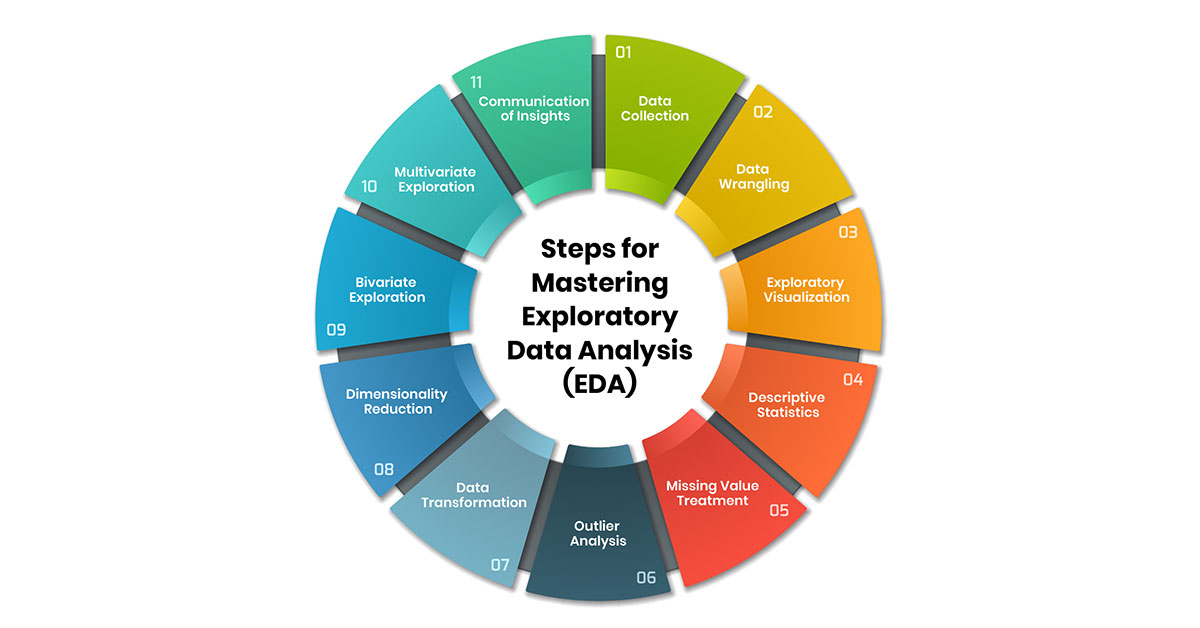

***להוריד כפילויות***

In [11]:
df.duplicated().sum()

np.int64(723)

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
df.describe()


age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

***נרצה לראות כמה חולים/בריאים יש:***

In [16]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

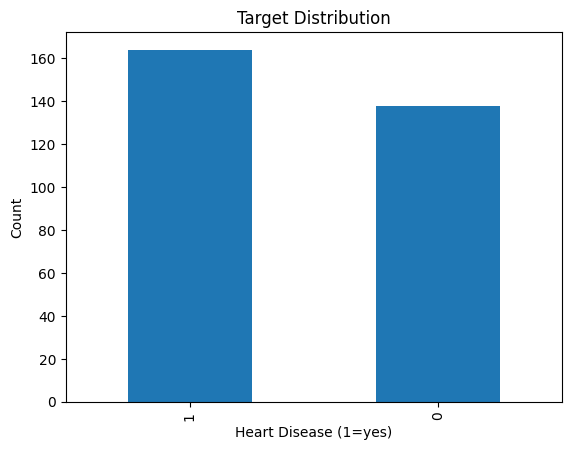

In [17]:
df['target'].value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.xlabel("Heart Disease (1=yes)")
plt.ylabel("Count")
plt.show()


***התפלגות משתנים חשובים:***

### **Research:** Pose relevant questions about your dataset, then answer them using visual elements (e.g. charts or plots) to provide clear insights.

For example, in the 2nd lecture the entire class took a survey. Then, we talked about the collected data and desplayed the collected data using the right **plots** - Lines, Bars, Hist, Pie, Map, HeatMap, Area, Time, etc.

An aditional more specific example, would be the questions we asked during the recitation on the `Titanic` dataset:
  - "Did survival rates differ by gender?"
  - "Was passenger class related to survival?"
  - "What was the age distribution of survivors vs. non-survivors?"
  - "Did embarking location (port) have any effect on survival?"    
  
And how we answered those questions using **plots**.

The idea is to pose questions that can uncover patterns, correlations, or anomalies in your dataset, then back those up with clean, insightful visualizations.

***AGE:***

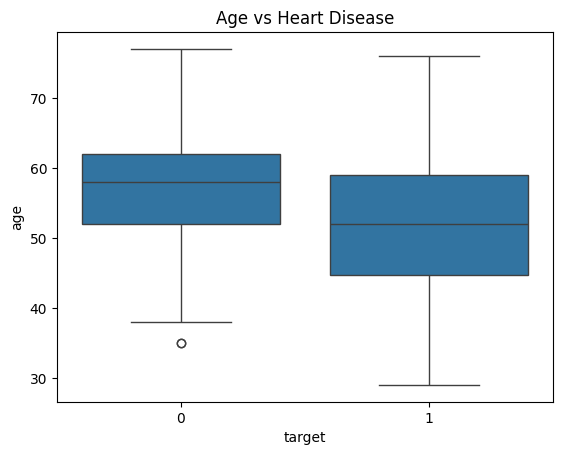

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()


***CHOL:***

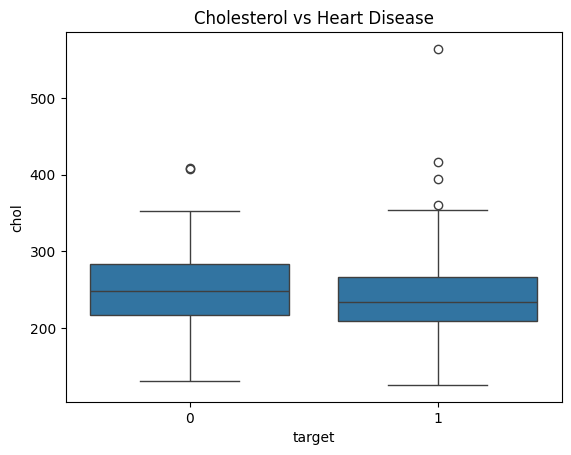

In [19]:
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()


***thalach:***

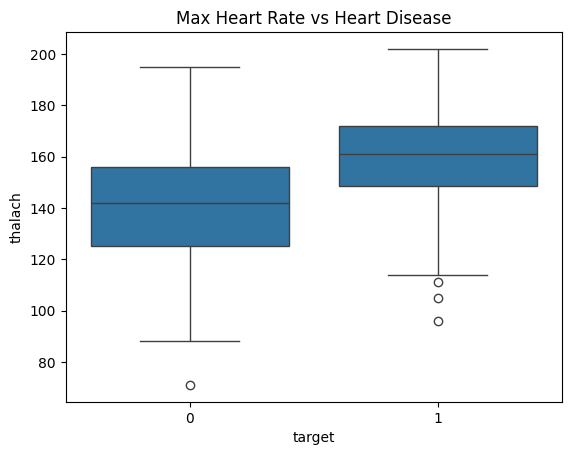

In [20]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()


***oldpeak:***

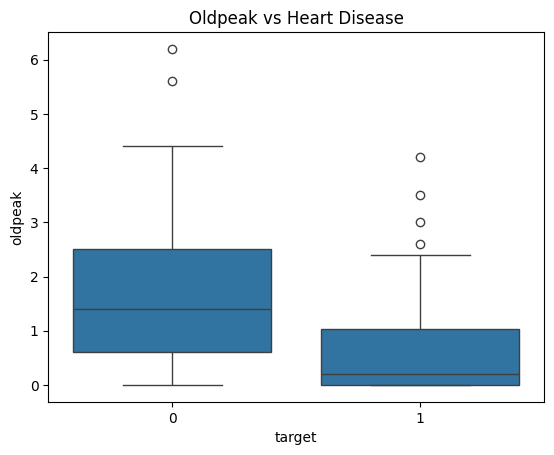

In [21]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title("Oldpeak vs Heart Disease")
plt.show()


***cp - chest pain:***

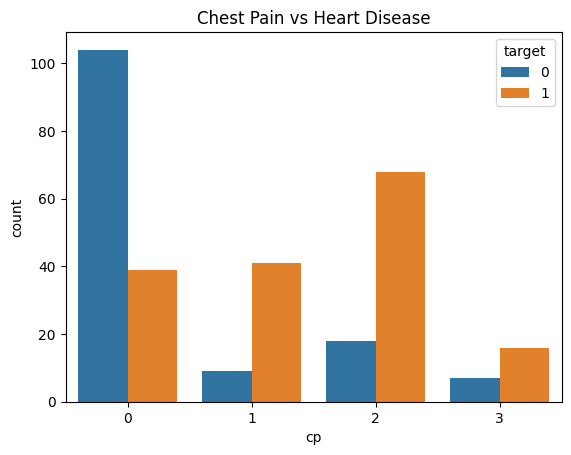

In [22]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain vs Heart Disease")
plt.show()


***exang - pain during effort:***

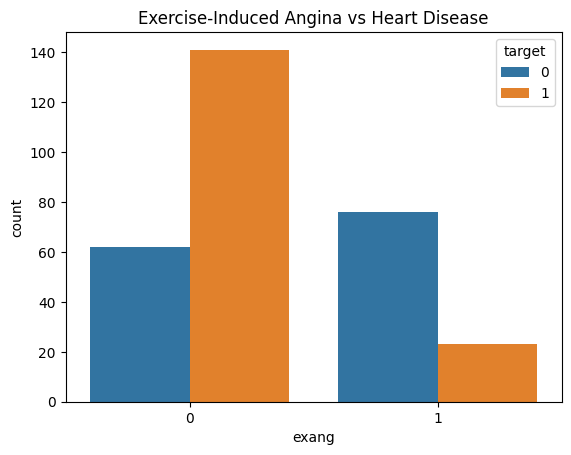

In [23]:
sns.countplot(x='exang', hue='target', data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.show()


***CA - BLOCKED BLOOD VESSELS:***

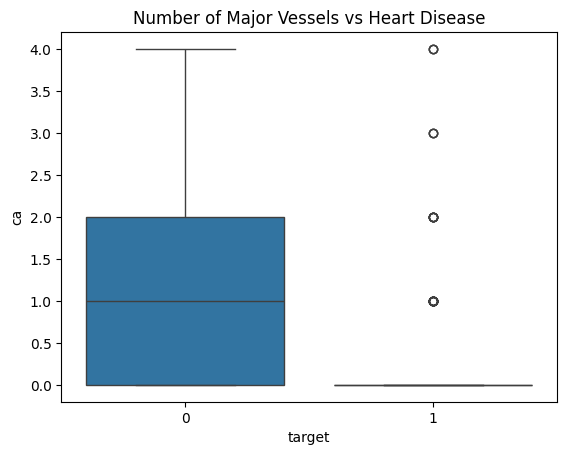

In [24]:
sns.boxplot(x='target', y='ca', data=df)
plt.title("Number of Major Vessels vs Heart Disease")
plt.show()


***THAL:***

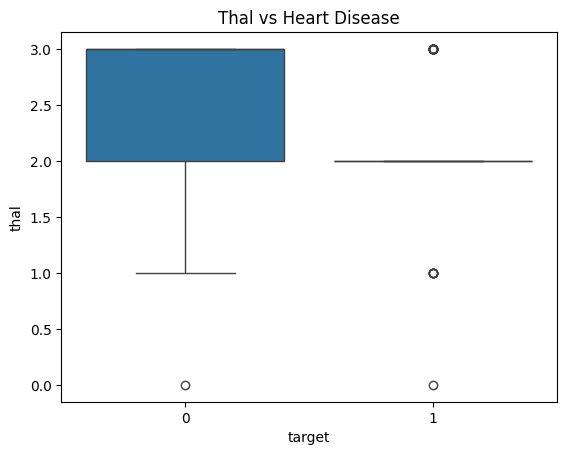

In [25]:
sns.boxplot(x='target', y='thal', data=df)
plt.title("Thal vs Heart Disease")
plt.show()


<br><br><br>

---

<br><br><br>

# **Part 3: README file**

1. Upload the dataset to HuggingFace.

2. Upload your work (code, notebook) to your HF's Dataset.

3. Create a `README` file in a Markdown format. This page should include the end result of your work. Meaning include the visualizations, Questions, Answers, insights, Decisions, and more.


<br><br><br>

---

<br><br><br>

# **Part 4: Presentation Video**

- Record a brief video (2–3 minutes) with screen sharing of you walk through the HF's Dataset, README, notebook and sharing your process & results. Make sure to include a screen share while also recording yourself talking during the walk through.

- Videos without your face talking while going ower your work wont be acceptable.

- You should include:
  - A quick dataset overview and your main goal.
  - Key EDA steps and highlights of visual insights. (!)
  - Reflections on any challenges and lessons learned.


> For help:
> - Youtube [Watch this video](https://www.youtube.com/watch?v=DK7Z_nYhjjg)
> - Loom [Watch this video](https://www.youtube.com/watch?v=eSCHNXTsJK8)
> - Zoom [Watch this video](https://www.youtube.com/watch?v=njwbjFYCbGU)


Finally, attach the video to the end of the `README` file, and make sure everything works.

<br><br><br>

# **Part 5: Moodle**

**Submit to Moodle the link to your HF's Dataset.**  
(or use a `.txt` file)

> As the dataset already includes the video presentation, and the code notebook - we should haver everything there to examine.



---

Good luck and have fun exploring your first DS project!